# <font color='red'>**Sequence to sequence implementation**</font>

**There will be some functions that start with the word "grader" ex: grader_check_encoder(), grader_check_attention(), grader_onestepdecoder() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

**Note 1:**  There are many blogs on the attention mechanisum which might be misleading you,
 so do read the references completly and after that only please check the internet.
 The best things is to read the research papers and try to implement it on your own. 

**Note 2:** To complete this assignment, the reference that are mentioned will be enough.

**Note 3:** If you are starting this assignment, you might have completed minimum of 20 assignment.
 If  you are still not able to implement this algorithm you might have rushed in the previous assignments 
with out learning much and didn't spend your time productively.

## Task -1: Simple Encoder and Decoder
Implement simple Encoder-Decoder model

1. Download the **Italian** to **English** translation dataset from <a href="http://www.manythings.org/anki/ita-eng.zip">here</a>

2. You will find **ita.txt** file in that ZIP, 
you can read that data using python and preprocess that data this way only: 
<img src='https://i.imgur.com/z0j79Jf.png'>    
    
3. You have to implement a simple Encoder and Decoder architecture  

4. Use BLEU score as metric to evaluate your model. You can use any loss function you need.

5. You have to use Tensorboard to plot the Graph, Scores and histograms of gradients. 

6.  a. Check the reference notebook <br>
    b. <a href="https://medium.com/analytics-vidhya/understand-sequence-to-sequence-models-in-a-more-intuitive-way-1d517d8795bb">Resource 2</a>
    



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<font color='blue'>**Load the data**</font>

In [2]:
import zipfile
f=zipfile.ZipFile('/content/drive/MyDrive/ita-eng.zip','r')
f.extractall()

In [3]:
import pandas as pd


In [4]:
with open('ita.txt', 'r', encoding="utf8") as f:
    eng=[]
    ita=[]
    for i in f.readlines():
        eng.append(i.split("\t")[0])
        ita.append(i.split("\t")[1])
data = pd.DataFrame(data=list(zip(eng,ita)), columns=['english','italian'])
print(data.shape)
data.head() 

(354238, 2)


,english,italian
0,Hi.,Ciao!
1,Hi.,Ciao.
2,Run!,Corri!
3,Run!,Corra!
4,Run!,Correte!


<font color='blue'>**Preprocess data**</font>

In [5]:
import re

In [6]:
def decontractions(phrase):
    """decontracted takes text and convert contractions into natural form.
     ref: https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python/47091490#47091490"""
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"won\’t", "will not", phrase)
    phrase = re.sub(r"can\’t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)

    phrase = re.sub(r"n\’t", " not", phrase)
    phrase = re.sub(r"\’re", " are", phrase)
    phrase = re.sub(r"\’s", " is", phrase)
    phrase = re.sub(r"\’d", " would", phrase)
    phrase = re.sub(r"\’ll", " will", phrase)
    phrase = re.sub(r"\’t", " not", phrase)
    phrase = re.sub(r"\’ve", " have", phrase)
    phrase = re.sub(r"\’m", " am", phrase)

    return phrase

def preprocess(text):
    # convert all the text into lower letters
    # use this function to remove the contractions: https://gist.github.com/anandborad/d410a49a493b56dace4f814ab5325bbd
    # remove all the spacial characters: except space ' '
    text = text.lower()
    text = decontractions(text)
    text = re.sub('[^A-Za-z0-9 ]+', '', text)
    return text

def preprocess_ita(text):
    # convert all the text into lower letters
    # remove the words betweent brakets ()
    # remove these characters: {'$', ')', '?', '"', '’', '.',  '°', '!', ';', '/', "'", '€', '%', ':', ',', '('}
    # replace these spl characters with space: '\u200b', '\xa0', '-', '/'
    # we have found these characters after observing the data points, feel free to explore more and see if you can do find more
    # you are free to do more proprocessing
    # note that the model will learn better with better preprocessed data 
    
    text = text.lower()
    text = decontractions(text)
    text = re.sub('[$)\?"’.°!;\'€%:,(/]', '', text)
    text = re.sub('\u200b', ' ', text)
    text = re.sub('\xa0', ' ', text)
    text = re.sub('-', ' ', text)
    return text


data['english'] = data['english'].apply(preprocess)
data['italian'] = data['italian'].apply(preprocess_ita)
data.head()

,english,italian
0,hi,ciao
1,hi,ciao
2,run,corri
3,run,corra
4,run,correte


In [7]:
ita_lengths = data['italian'].str.split().apply(len)
eng_lengths = data['english'].str.split().apply(len)

In [8]:
import numpy as np

In [ ]:
for i in range(0,101,10):
    print(i,np.percentile(ita_lengths, i))
for i in range(90,101):
    print(i,np.percentile(ita_lengths, i))
for i in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print(i,np.percentile(ita_lengths, i))

0 1.0
10 3.0
20 4.0
30 4.0
40 5.0
50 5.0
60 6.0
70 6.0
80 7.0
90 8.0
100 92.0
90 8.0
91 8.0
92 8.0
93 9.0
94 9.0
95 9.0
96 9.0
97 10.0
98 11.0
99 12.0
100 92.0
99.1 12.0
99.2 12.0
99.3 13.0
99.4 13.0
99.5 13.0
99.6 14.0
99.7 15.0
99.8 16.0
99.9 22.0
100 92.0


In [ ]:
for i in range(0,101,10):
    print(i,np.percentile(eng_lengths, i))
for i in range(90,101):
    print(i,np.percentile(eng_lengths, i))
for i in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print(i,np.percentile(eng_lengths, i))

0 1.0
10 4.0
20 4.0
30 5.0
40 5.0
50 6.0
60 6.0
70 7.0
80 7.0
90 8.0
100 101.0
90 8.0
91 9.0
92 9.0
93 9.0
94 9.0
95 9.0
96 10.0
97 10.0
98 11.0
99 12.0
100 101.0
99.1 12.0
99.2 13.0
99.3 13.0
99.4 13.0
99.5 14.0
99.6 14.0
99.7 15.0
99.8 16.0
99.9 25.0
100 101.0


In [ ]:
data.head()

,english,italian
0,hi,ciao
1,hi,ciao
2,run,corri
3,run,corra
4,run,correte


In [9]:
data['italian_len'] = data['italian'].str.split().apply(len)
data = data[data['italian_len'] < 22]

data['english_len'] = data['english'].str.split().apply(len)
data = data[data['english_len'] < 25]

data['english_inp'] = '<start> ' + data['english'].astype(str)
data['english_out'] = data['english'].astype(str) + ' <end>'
# data = data.drop(['english','italian_len','english_len','italian'], axis=1)
# only for the first sentance add a toke <end> so that we will have <end> in tokenizer
data.head()

,english,italian,italian_len,english_len,english_inp,english_out
0,hi,ciao,1,1,<start> hi,hi <end>
1,hi,ciao,1,1,<start> hi,hi <end>
2,run,corri,1,1,<start> run,run <end>
3,run,corra,1,1,<start> run,run <end>
4,run,correte,1,1,<start> run,run <end>


In [10]:
data = data.drop(['english','italian_len','english_len'], axis=1)
data.head()

,italian,english_inp,english_out
0,ciao,<start> hi,hi <end>
1,ciao,<start> hi,hi <end>
2,corri,<start> run,run <end>
3,corra,<start> run,run <end>
4,correte,<start> run,run <end>


In [11]:
from sklearn.model_selection import train_test_split
train, validation = train_test_split(data, test_size=0.2,random_state=1)

In [12]:
print(train.shape, validation.shape)
# for one sentence we will be adding <end> token so that the tokanizer learns the word <end>
# with this we can use only one tokenizer for both encoder output and decoder output
train.iloc[0]['english_inp']= str(train.iloc[0]['english_inp'])+' <end>'

(283068, 3) (70767, 3)


In [13]:
train.head()

,italian,english_inp,english_out
122627,ci vedremo la settimana prossima,<start> i will see you next week <end>,i will see you next week <end>
130538,chi le ha dato questo elenco,<start> who gave you this list,who gave you this list <end>
161415,dobbiamo andarcene da questo posto,<start> we must leave this place,we must leave this place <end>
207536,tom sta guardando un film ora,<start> tom is watching a movie now,tom is watching a movie now <end>
102547,non si scordi la borsa,<start> do not forget your bag,do not forget your bag <end>


In [14]:
import tensorflow as tf

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [16]:
tknizer_ita = Tokenizer()
tknizer_ita.fit_on_texts(train['italian'].values)
tknizer_eng = Tokenizer(filters='!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n')
tknizer_eng.fit_on_texts(train['english_inp'].values)

In [17]:
vocab_size_eng=len(tknizer_eng.word_index.keys())
print(vocab_size_eng)
vocab_size_ita=len(tknizer_ita.word_index.keys())
print(vocab_size_ita)

13086
26775


In [18]:
print(tknizer_eng.word_index['<start>'], tknizer_eng.word_index['<end>'])

1 10327


In [ ]:
embeddings_index = dict()
f = open('/content/drive/MyDrive/Kaggle/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

embedding_matrix = np.zeros((vocab_size_eng+1, 100))
for word, i in tknizer_eng.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
np.save('/content/drive/MyDrive/Kaggle/seq2seqEmbedding.npy',embedding_matrix)

In [ ]:
embedding_matrix=np.load('/content/drive/MyDrive/Kaggle/seq2seqEmbedding.npy',allow_pickle=True)

In [ ]:
embedding_matrix.shape

(13052, 100)

## <font color='blue'>**Implement custom encoder decoder**</font>

<font color='blue'>**Encoder**</font>

In [19]:
import numpy as np
import tensorflow as tf

In [20]:
from tensorflow.keras.layers import LSTM,Embedding,Dense,Input,TimeDistributed

In [83]:
class Encoder(tf.keras.Model):
    '''
    Encoder model -- That takes a input sequence and returns encoder-outputs,encoder_final_state_h,encoder_final_state_c
    '''

    def __init__(self,inp_vocab_size,embedding_size,lstm_size,input_length):

        #Initialize Embedding layer
        #Intialize Encoder LSTM layer
        super().__init__()
        self.inp_vocab_size=inp_vocab_size
        self.embedding_size=embedding_size
        self.input_length=input_length
        self.lstm_size=lstm_size
        self.encoder_output = 0
        self.encoder_state_h=0
        self.encoder_state_c=0
        self.embedding = Embedding(input_dim=self.inp_vocab_size, output_dim=self.embedding_size, input_length=self.input_length,
                           mask_zero=True, name="embedding_layer_encoder")
        self.lstm = LSTM(self.lstm_size, return_state=True,return_sequences=True, name="Encoder_LSTM")
    def call(self,input_sequence,states):
        '''
          This function takes a sequence input and the initial states of the encoder.
          Pass the input_sequence input to the Embedding layer, Pass the embedding layer ouput to encoder_lstm
          returns -- encoder_output, last time step's hidden and cell state
        '''
        print("ENCODER ==> INPUT SQUENCES SHAPE :",input_sequence.shape)
        input_embedd                           = self.embedding(input_sequence)

        self.encoder_output, self.encoder_state_h,self.encoder_state_c = self.lstm(input_embedd,states)
        return self.encoder_output, self.encoder_state_h,self.encoder_state_c

    
    def initialize_states(self,batch_size):
      '''
      Given a batch size it will return intial hidden state and intial cell state.
      If batch size is 32- Hidden state is zeros of size [32,lstm_units], cell state zeros is of size [32,lstm_units]
      '''
      self.initial_hidden_state=tf.zeros(shape=(batch_size,self.lstm_size))
      self.initial_cell_state=tf.zeros(shape=(batch_size,self.lstm_size))
      return [self.initial_hidden_state,self.initial_cell_state]

<font color='orange'>**Grader function - 1**</font>

In [84]:
def grader_check_encoder():
    '''
        vocab-size: Unique words of the input language,
        embedding_size: output embedding dimension for each word after embedding layer,
        lstm_size: Number of lstm units,
        input_length: Length of the input sentence,
        batch_size
    '''
    vocab_size=10
    embedding_size=20
    lstm_size=32
    input_length=10
    batch_size=16
    #Intialzing encoder 
    encoder=Encoder(vocab_size,embedding_size,lstm_size,input_length)
    input_sequence=tf.random.uniform(shape=[batch_size,input_length],maxval=vocab_size,minval=0,dtype=tf.int32)
    #Intializing encoder initial states
    initial_state=encoder.initialize_states(batch_size)
    
    encoder_output,state_h,state_c=encoder(input_sequence,initial_state)
    
    assert(encoder_output.shape==(batch_size,input_length,lstm_size) and state_h.shape==(batch_size,lstm_size) and state_c.shape==(batch_size,lstm_size))
    return True
print(grader_check_encoder())

ENCODER ==> INPUT SQUENCES SHAPE : (16, 10)
True


In [85]:
class Decoder(tf.keras.Model):
    '''
    Encoder model -- That takes a input sequence and returns output sequence
    '''

    def __init__(self,out_vocab_size,embedding_size,lstm_size,input_length):

        #Initialize Embedding layer
        #Intialize Decoder LSTM layer
        super().__init__()
        self.out_vocab_size=out_vocab_size
        self.embedding_size=embedding_size
        self.lstm_size=lstm_size
        self.input_length=input_length
        self.embedding = Embedding(input_dim=self.out_vocab_size, output_dim=self.embedding_size, input_length=self.input_length,mask_zero=True, name="embedding_layer_decoder")
        self.lstm = LSTM(self.lstm_size, return_sequences=True, return_state=True, name="Encoder_LSTM")
    def call(self,input_sequence,initial_states):
        '''
          This function takes a sequence input and the initial states of the encoder.
          Pass the input_sequence input to the Embedding layer, Pass the embedding layer ouput to decoder_lstm
        
          returns -- decoder_output,decoder_final_state_h,decoder_final_state_c
        '''

        print("DECODER ==> INPUT SQUENCES SHAPE :",input_sequence.shape)
        target_embedd           = self.embedding(input_sequence)
        print("WE ARE INITIALIZING DECODER WITH ENCODER STATES :",initial_states)
        decoder_output, decoder_final_state_h,decoder_final_state_c= self.lstm(target_embedd, initial_state=initial_states)
        return decoder_output,decoder_final_state_h,decoder_final_state_c

<font color='orange'>**Grader function - 2**</font>

In [86]:
def grader_decoder():
    '''
        out_vocab_size: Unique words of the target language,
        embedding_size: output embedding dimension for each word after embedding layer,
        dec_units: Number of lstm units in decoder,
        input_length: Length of the input sentence,
        batch_size
        
    
    '''
    out_vocab_size=13 
    embedding_dim=100
    input_length=10
    dec_units=16 
    batch_size=32
    
    target_sentences=tf.random.uniform(shape=(batch_size,input_length),maxval=10,minval=0,dtype=tf.int32)
    print(target_sentences[0])
    encoder_output=tf.random.uniform(shape=[batch_size,input_length,dec_units])
    state_h=tf.random.uniform(shape=[batch_size,dec_units])
    state_c=tf.random.uniform(shape=[batch_size,dec_units])
    states=[state_h,state_c]
    decoder=Decoder(out_vocab_size, embedding_dim, dec_units,input_length )
    output,_,_=decoder(target_sentences, states)
    print(output.shape)
    assert(output.shape==(batch_size,input_length,dec_units))
    return True
print(grader_decoder())


tf.Tensor([1 5 1 7 7 9 6 2 0 8], shape=(10,), dtype=int32)
DECODER ==> INPUT SQUENCES SHAPE : (32, 10)
WE ARE INITIALIZING DECODER WITH ENCODER STATES : [<tf.Tensor: shape=(32, 16), dtype=float32, numpy=
array([[0.92179024, 0.16340113, 0.6480031 , 0.43840408, 0.32647872,
        0.13078666, 0.5185168 , 0.2949556 , 0.1530428 , 0.23431706,
        0.75380135, 0.05600166, 0.36792672, 0.9631493 , 0.01799679,
        0.20237362],
       [0.20225394, 0.27778184, 0.5098262 , 0.15119994, 0.08031154,
        0.4902991 , 0.6168529 , 0.05001652, 0.17247474, 0.4787799 ,
        0.21444106, 0.79419625, 0.5458056 , 0.3933618 , 0.37510586,
        0.8311132 ],
       [0.81137526, 0.9975141 , 0.15676665, 0.7474166 , 0.11488032,
        0.14572072, 0.84651685, 0.9564847 , 0.31727183, 0.4812311 ,
        0.9795867 , 0.18806267, 0.55223703, 0.04798007, 0.6617298 ,
        0.82730174],
       [0.82166517, 0.41886282, 0.891657  , 0.7594162 , 0.82484484,
        0.39074683, 0.86574507, 0.52426493, 0.7308217

In [88]:
class Encoder_decoder(tf.keras.Model):
    
    def __init__(self,encoder_inputs_length,decoder_inputs_length,output_vocab_size,batch_size,encoder_size,decoder_size):
         
        #Create encoder object
        #Create decoder object
        #Intialize Dense layer(out_vocab_size) with activation='softmax'
        super().__init__() # https://stackoverflow.com/a/27134600/4084039
        self.encoder = Encoder(inp_vocab_size=vocab_size_ita, embedding_size=100, input_length=encoder_inputs_length, lstm_size=encoder_size)
        self.decoder = Decoder(out_vocab_size=vocab_size_eng, embedding_size=100, input_length=decoder_inputs_length, lstm_size=decoder_size)
        # self.dense   = Dense(output_vocab_size, activation='softmax')
        self.td=TimeDistributed(Dense(output_vocab_size, activation='softmax'))
        self.batch_size=batch_size
        self.initial_states = self.encoder.initialize_states(self.batch_size)
    def call(self,data):
        '''
        A. Pass the input sequence to Encoder layer -- Return encoder_output,encoder_final_state_h,encoder_final_state_c
        B. Pass the target sequence to Decoder layer with intial states as encoder_final_state_h,encoder_final_state_C
        C. Pass the decoder_outputs into Dense layer 
        
        Return decoder_outputs
        '''
        input_sequence= data[0]
        output_sequence=data[1]
        encoder_output,encoder_final_state_h,encoder_final_state_c=self.encoder(input_sequence,self.initial_states)
        states=[encoder_final_state_h,encoder_final_state_c]
        decoder_output,decoder_final_state_h,decoder_final_state_c=self.decoder(output_sequence,states)
        output=self.td(decoder_output)
        return output

In [21]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
max(data['english_out'].str.split().apply(len))

25

In [22]:
class Dataset:
    def __init__(self, data, tknizer_ita, tknizer_eng, max_len):
        self.encoder_inps = data['italian'].values
        self.decoder_inps = data['english_inp'].values
        self.decoder_outs = data['english_out'].values
        self.tknizer_eng = tknizer_eng
        self.tknizer_ita = tknizer_ita
        self.max_len = max_len

    def __getitem__(self, i):
        self.encoder_seq = self.tknizer_ita.texts_to_sequences([self.encoder_inps[i]]) # need to pass list of values
        self.decoder_inp_seq = self.tknizer_eng.texts_to_sequences([self.decoder_inps[i]])
        self.decoder_out_seq = self.tknizer_eng.texts_to_sequences([self.decoder_outs[i]])

        self.encoder_seq = pad_sequences(self.encoder_seq, maxlen=self.max_len, dtype='int32', padding='post')
        self.decoder_inp_seq = pad_sequences(self.decoder_inp_seq, maxlen=self.max_len, dtype='int32', padding='post')
        self.decoder_out_seq = pad_sequences(self.decoder_out_seq, maxlen=self.max_len, dtype='int32', padding='post')
        return self.encoder_seq, self.decoder_inp_seq, self.decoder_out_seq

    def __len__(self): # your model.fit_gen requires this function
        return len(self.encoder_inps)
class Dataloader(tf.keras.utils.Sequence):    
    def __init__(self, dataset, batch_size=1):
        self.dataset = dataset
        self.batch_size = batch_size
        self.indexes = np.arange(len(self.dataset.encoder_inps))


    def __getitem__(self, i):
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data = []
        for j in range(start, stop):
            data.append(self.dataset[j])

        batch = [np.squeeze(np.stack(samples, axis=1), axis=0) for samples in zip(*data)]
        # we are creating data like ([italian, english_inp], english_out) these are already converted into seq
        return tuple([[batch[0], batch[1]], batch[2]])

    def __len__(self):  # your model.fit_gen requires this function
        return len(self.indexes) // self.batch_size

    def on_epoch_end(self):
        self.indexes = np.random.permutation(self.indexes)        

In [23]:
train_dataset = Dataset(train, tknizer_ita, tknizer_eng, 25)
test_dataset  = Dataset(validation, tknizer_ita, tknizer_eng, 25)

train_dataloader = Dataloader(train_dataset, batch_size=1024)
test_dataloader = Dataloader(test_dataset, batch_size=1024)


print(train_dataloader[0][0][0].shape, train_dataloader[0][0][1].shape, train_dataloader[0][1].shape)

(1024, 25) (1024, 25) (1024, 25)


In [89]:
#Create an object of encoder_decoder Model class, 
# Compile the model and fit the model
model  = Encoder_decoder(encoder_inputs_length=25,decoder_inputs_length=25,output_vocab_size=vocab_size_eng,batch_size=1024,encoder_size=256,decoder_size=256)

In [90]:
def scheduler(epoch,lr):
  if epoch%2==1:
    lr=0.9*lr
  return lr
callbacks=[ModelCheckpoint(filepath='best_vanilla_model.h5',save_best_only=True,mode='min',save_weights_only=True),
           LearningRateScheduler(scheduler)]

In [91]:
optimizer = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy')
train_steps=train.shape[0]//1024
valid_steps=validation.shape[0]//1024
model.fit(train_dataloader, batch_size=1024,steps_per_epoch=train_steps, epochs=30, validation_data=test_dataloader, validation_steps=valid_steps,callbacks=callbacks)

ENCODER ==> INPUT SQUENCES SHAPE : (1024, 25)
DECODER ==> INPUT SQUENCES SHAPE : (1024, 25)
WE ARE INITIALIZING DECODER WITH ENCODER STATES : [<tf.Tensor: shape=(1024, 256), dtype=float32, numpy=
array([[-0.00535074,  0.00554437, -0.00375006, ..., -0.00108819,
        -0.00389561,  0.00183007],
       [-0.00456535, -0.00222861, -0.00568424, ...,  0.0024075 ,
        -0.0033401 , -0.00502326],
       [ 0.00093474,  0.00078609, -0.00268965, ...,  0.00862669,
        -0.0015534 , -0.00375482],
       ...,
       [ 0.00115088,  0.00062637, -0.00173641, ...,  0.00379096,
        -0.01029191, -0.00115002],
       [ 0.00700191,  0.00326212, -0.00610604, ...,  0.00084154,
        -0.00656535,  0.00270223],
       [-0.00085911, -0.00214373, -0.00536723, ...,  0.0049578 ,
         0.00786184,  0.00523582]], dtype=float32)>, <tf.Tensor: shape=(1024, 256), dtype=float32, numpy=
array([[-0.0106191 ,  0.01104696, -0.00752795, ..., -0.00219365,
        -0.00787075,  0.00366351],
       [-0.00911385, 

KeyboardInterrupt: ignored

In [92]:
model.load_weights('/content/best_vanilla_model.h5')

In [93]:
model.evaluate(test_dataloader)

69/69 [==============================] - 14s 197ms/step - loss: 0.1716


0.1715967357158661

In [94]:
model.save('/content/drive/MyDrive/Kaggle/seq2seqmodel1',save_format='tf')

ENCODER ==> INPUT SQUENCES SHAPE : (None, 25)
DECODER ==> INPUT SQUENCES SHAPE : (None, 25)
WE ARE INITIALIZING DECODER WITH ENCODER STATES : [<tf.Tensor 'encoder_decoder_10/encoder_11/Encoder_LSTM/PartitionedCall:2' shape=(1024, 256) dtype=float32>, <tf.Tensor 'encoder_decoder_10/encoder_11/Encoder_LSTM/PartitionedCall:3' shape=(1024, 256) dtype=float32>]
ENCODER ==> INPUT SQUENCES SHAPE : (None, 25)
ENCODER ==> INPUT SQUENCES SHAPE : (None, 25)
DECODER ==> INPUT SQUENCES SHAPE : (None, 25)
WE ARE INITIALIZING DECODER WITH ENCODER STATES : [<tf.Tensor 'initial_states:0' shape=(None, 256) dtype=float32>, <tf.Tensor 'initial_states_1:0' shape=(None, 256) dtype=float32>]
DECODER ==> INPUT SQUENCES SHAPE : (None, 25)
WE ARE INITIALIZING DECODER WITH ENCODER STATES : [<tf.Tensor 'initial_states:0' shape=(None, 256) dtype=float32>, <tf.Tensor 'initial_states_1:0' shape=(None, 256) dtype=float32>]
ENCODER ==> INPUT SQUENCES SHAPE : (None, 25)
DECODER ==> INPUT SQUENCES SHAPE : (None, 25)
WE 

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Kaggle/seq2seqmodel1/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Kaggle/seq2seqmodel1/assets


In [ ]:
model=tf.keras.models.load_model('/content/drive/MyDrive/Kaggle/seq2seqmodel1')

In [95]:
def predict(input_sentence):

  '''
  A. Given input sentence, convert the sentence into integers using tokenizer used earlier
  B. Pass the input_sequence to encoder. we get encoder_outputs, last time step hidden and cell state
  C. Initialize index of <start> as input to decoder. and encoder final states as input_states to decoder
  D. till we reach max_length of decoder or till the model predicted word <end>:
         predicted_out,state_h,state_c=model.layers[1](dec_input,states)
         pass the predicted_out to the dense layer
         update the states=[state_h,state_c]
         And get the index of the word with maximum probability of the dense layer output, using the tokenizer(word index) get the word and then store it in a string.
         Update the input_to_decoder with current predictions
  F. Return the predicted sentence
  '''

  final_sentence =[]
  enc_ita_data = np.array(tknizer_ita.texts_to_sequences(np.array(['<start> '+input_sentence+' <end>'])))
  enc_ita_data=pad_sequences(enc_ita_data,maxlen=25,padding='post')
  initial_state = model.encoder.initialize_states(batch_size = 1)
  #print(enc_ita_data)
  #print(type(enc_ita_data))
  encoder_output, encoder_h, encoder_c = model.layers[0](enc_ita_data,initial_state)

  decoder_input = np.array(tknizer_eng.texts_to_sequences(np.array(['<start>'])))

  states =(encoder_h, encoder_c)
  #print(decoder_input)
  max_length = 25 # in data preprocessing we have remove all datapoints which are greater then 20
  for i in range(max_length):

    predicted_out,state_h,state_c  =   model.layers[1](decoder_input,states)

    states = (state_h,state_c)

    output = model.layers[2](predicted_out)

    #print(output.shape)
    #print(np.argmax(output))
    #print(output)
    vec = np.argmax(output)
    word = tknizer_eng.index_word[vec]
    decoder_input = np.array([np.array([vec])])
    #print(decoder_input)
    #break
    final_sentence.append(word)
    if vec == tknizer_eng.word_index['<end>']:
      return ' '.join(final_sentence)
      

  return ' '.join(final_sentence)

In [96]:
test=data.sample(1000,ignore_index=True)
test.head()

,italian,english_inp,english_out
0,sognai di baciare tom,<start> i dreamed about kissing tom,i dreamed about kissing tom <end>
1,ti incontri spesso con tom,<start> do you meet tom often,do you meet tom often <end>
2,non ho mai visto quel tizio prima,<start> i have never seen that guy before,i have never seen that guy before <end>
3,tom è fiero di lei,<start> tom is proud of you,tom is proud of you <end>
4,penso di sapere cosa succede ora,<start> i think i know what happens now,i think i know what happens now <end>


In [97]:
scores=[]
import statistics
import nltk.translate.bleu_score as bleu
for i in range(len(test)):
  prediction=predict(test['italian'].values[i])
  reference = [test['english_out'].values[i].split()] # the original
  translation = prediction.split() # trasilated using model
  scores.append(bleu.sentence_bleu(reference, translation,weights=(1,0,0,0)))

ENCODER ==> INPUT SQUENCES SHAPE : (1, 25)
DECODER ==> INPUT SQUENCES SHAPE : (1, 1)
WE ARE INITIALIZING DECODER WITH ENCODER STATES : (<tf.Tensor: shape=(1, 256), dtype=float32, numpy=
array([[ 1.04501776e-01,  9.55773238e-03,  2.77299464e-01,
        -6.60737697e-03,  6.05429590e-01, -2.78411865e-01,
        -2.73142666e-01, -7.10660475e-04,  2.46547479e-05,
         4.45908960e-03,  2.07295548e-02,  7.73746241e-03,
         4.90181483e-02,  6.14089407e-02, -9.50584292e-01,
        -6.25617325e-01, -8.56492400e-01, -8.38192463e-01,
        -3.53519567e-07, -7.86382139e-01, -2.18489822e-06,
        -5.04865408e-01,  4.61510941e-02, -3.82231921e-01,
        -3.26053463e-02, -1.55686185e-01, -7.18144059e-01,
         2.82400823e-03,  7.03314781e-01, -2.33646140e-01,
        -3.81724123e-04,  4.61119771e-06,  6.72833502e-01,
        -2.15425454e-02, -1.56354174e-01, -1.05657809e-05,
        -1.40949094e-03, -7.86135495e-02,  1.31333708e-08,
         5.36561885e-04,  4.00801420e-01,  3.84

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg

Streaming output truncated to the last 5000 lines.
         6.14698708e-01,  4.79109734e-01,  9.59853709e-01,
        -7.77770206e-02,  1.64054260e-01, -8.59830752e-02,
        -2.37335474e-03, -1.93220183e-01,  8.75836849e-01,
        -4.25516488e-03,  8.66121900e-06,  1.10923700e-01,
         1.52852550e-01, -1.67688704e-03,  4.28669807e-03,
         9.12518799e-01, -1.64171914e-04, -9.81277108e-01,
        -6.73341990e-01,  9.99230504e-01,  8.57825816e-01,
         2.58876473e-01, -1.19568595e-08, -2.70967193e-10,
        -8.14280659e-02,  5.13520062e-01,  8.37011397e-01,
         3.26055742e-04,  9.13800061e-01, -6.97987911e-04,
         2.31944793e-03, -1.00632315e-06, -9.38602328e-01,
         1.70467943e-01,  6.35179051e-04,  9.07975674e-01,
         7.30619133e-01,  8.97674620e-01, -2.83040889e-02,
        -2.65623063e-01, -9.51373100e-01, -1.04419084e-03,
         6.59005309e-04,  4.41008508e-01, -1.29343406e-03,
        -3.33387841e-04,  7.76327014e-01,  7.79805487e-06,
     

In [ ]:
# Predict on 1000 random sentences on test data and calculate the average BLEU score of these sentences.
# https://www.nltk.org/_modules/nltk/translate/bleu_score.html

In [98]:
import statistics
print('Mean BLEU score for Vanilla encoder decoder model is :',statistics.mean(scores))

Mean BLEU score for Vanilla encoder decoder model is : 0.9100080943583135


## Task -2: Including Attention mechanisum

1. Use the preprocessed data from Task-1

2. You have to implement an Encoder and Decoder architecture with  
attention as discussed in the reference notebook.

    * Encoder   - with 1 layer LSTM <br>
    * Decoder   - with 1 layer LSTM<br>
    * attention -  (Please refer the <a href= 'https://drive.google.com/file/d/1z_bnc-3aubKawbR6q8wyI6Mh5ho2R1aZ/view?usp=sharing'>**reference notebook**</a> to know more about the attention mechanism.)
3. In Global attention, we have 3 types of scoring functions(as discussed in the reference notebook).
 As a part of this assignment **you need to create 3 models for each scoring function**
<img src='https://i.imgur.com/iD2jZo3.png'>

    * In model 1 you need to implemnt "dot" score function
    * In model 2 you need to implemnt "general" score function
    * In model 3 you need to implemnt "concat" score function.<br>
    
 **Please do add the markdown titles for each model so that we can have a better look at the code and verify.**
4. It is mandatory to train the model with simple model.fit() only, Donot train the model with custom GradientTape()

5. Using attention weights, you can plot the attention plots, 
please plot those for 2-3 examples. You can check about those in <a href="https://www.tensorflow.org/tutorials/text/nmt_with_attention#translate">this</a>

6. The attention layer has to be written by yourself only. 
The main objective of this assignment is to read and implement a paper on yourself so please do it yourself.  

7. Please implement the class **onestepdecoder** as mentioned in the assignment instructions.

8. You can use any tf.Keras highlevel API's to build and train the models. 
 Check the reference notebook for better understanding.

9. Use BLEU score as metric to evaluate your model. You can use any loss function you need.

10. You have to use Tensorboard to plot the Graph, Scores and histograms of gradients. 

11. Resources:
    a. Check the reference notebook
    b. <a href="https://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/">Resource 1</a>
    c. <a href="https://www.tensorflow.org/tutorials/text/nmt_with_attention">Resource 2</a>
    d. <a href="https://stackoverflow.com/questions/44238154/what-is-the-difference-between-luong-attention-and-bahdanau-attention#:~:text=Luong%20attention%20used%20top%20hidden,hidden%20state%20at%20time%20t.">Resource 3</a>
    

### <font color='blue'>**Implement custom encoder decoder and attention layers**</font>

<font color='blue'>**Encoder**</font>

In [24]:
class Encoder(tf.keras.Model):
    '''
    Encoder model -- That takes a input sequence and returns encoder-outputs,encoder_final_state_h,encoder_final_state_c
    '''

    def __init__(self,inp_vocab_size,embedding_size,lstm_size,input_length):

        #Initialize Embedding layer
        #Intialize Encoder LSTM layer
        super().__init__()
        self.inp_vocab_size=inp_vocab_size
        self.embedding_size=embedding_size
        self.input_length=input_length
        self.lstm_size=lstm_size
        self.encoder_output = 0
        self.encoder_state_h=0
        self.encoder_state_c=0
        self.embedding = Embedding(input_dim=self.inp_vocab_size, output_dim=self.embedding_size, input_length=self.input_length,
                           mask_zero=True, name="embedding_layer_encoder")
        self.lstm = LSTM(self.lstm_size, return_state=True,return_sequences=True, name="Encoder_LSTM")
    def call(self,input_sequence,states):
        '''
          This function takes a sequence input and the initial states of the encoder.
          Pass the input_sequence input to the Embedding layer, Pass the embedding layer ouput to encoder_lstm
          returns -- encoder_output, last time step's hidden and cell state
        '''
        # print("ENCODER ==> INPUT SQUENCES SHAPE :",input_sequence.shape)
        input_embedd                           = self.embedding(input_sequence)

        self.encoder_output, self.encoder_state_h,self.encoder_state_c = self.lstm(input_embedd,states)
        return self.encoder_output, self.encoder_state_h,self.encoder_state_c

    
    def initialize_states(self,batch_size):
      '''
      Given a batch size it will return intial hidden state and intial cell state.
      If batch size is 32- Hidden state is zeros of size [32,lstm_units], cell state zeros is of size [32,lstm_units]
      '''
      self.initial_hidden_state=tf.zeros(shape=(batch_size,self.lstm_size))
      self.initial_cell_state=tf.zeros(shape=(batch_size,self.lstm_size))
      return [self.initial_hidden_state,self.initial_cell_state]

<font color='cyan'>**Grader function - 1**</font>

In [ ]:
def grader_check_encoder():
    
    '''
        vocab-size: Unique words of the input language,
        embedding_size: output embedding dimension for each word after embedding layer,
        lstm_size: Number of lstm units in encoder,
        input_length: Length of the input sentence,
        batch_size
    '''
    
    vocab_size=10
    embedding_size=20
    lstm_size=32
    input_length=10
    batch_size=16
    encoder=Encoder(vocab_size,embedding_size,lstm_size,input_length)
    input_sequence=tf.random.uniform(shape=[batch_size,input_length],maxval=vocab_size,minval=0,dtype=tf.int32)
    initial_state=encoder.initialize_states(batch_size)
    encoder_output,state_h,state_c=encoder(input_sequence,initial_state)
    
    assert(encoder_output.shape==(batch_size,input_length,lstm_size) and state_h.shape==(batch_size,lstm_size) and state_c.shape==(batch_size,lstm_size))
    return True
print(grader_check_encoder())

True


<font color='blue'>**Attention**</font>

In [53]:
class Attention(tf.keras.layers.Layer):
  '''
    Class the calculates score based on the scoring_function using Bahdanu attention mechanism.
  '''
  def __init__(self,scoring_function, att_units):
    super().__init__()
    self.scoring_function=scoring_function
    # Please go through the reference notebook and research paper to complete the scoring functions
    self.softmax=tf.keras.activations.softmax
    if self.scoring_function=='dot':
      # Intialize variables needed for Dot score function here
      pass
    if scoring_function == 'general':
      # Intialize variables needed for General score function here
      self.w=Dense(att_units)
      pass
    elif scoring_function == 'concat':
      # Intialize variables needed for Concat score function here
      self.w1=Dense(att_units,activation='tanh')
      self.v=Dense(1)
      pass
  
  
  def call(self,decoder_hidden_state,encoder_output):
    '''
      Attention mechanism takes two inputs current step -- decoder_hidden_state and all the encoder_outputs.
      * Based on the scoring function we will find the score or similarity between decoder_hidden_state and encoder_output.
        Multiply the score function with your encoder_outputs to get the context vector.
        Function returns context vector and attention weights(softmax - scores)
    '''
    #print(decoder_hidden_state.shape,encoder_output.shape)
    decoder_hidden_state=tf.expand_dims(decoder_hidden_state,axis=1)
    # print('Decoder hidden state',decoder_hidden_state.shape)
    # print('Encoder output',encoder_output.shape)
    if self.scoring_function == 'dot':
        # Implement Dot score function here
        score=tf.matmul(decoder_hidden_state,encoder_output,transpose_b=True)
        #print('Dot Score',score.shape)
        pass
    elif self.scoring_function == 'general':
        # Implement General score function here
        score=tf.matmul(decoder_hidden_state,self.w(encoder_output),transpose_b=True)
        #print('general score',score.shape)
        pass
    elif self.scoring_function == 'concat':
        # Implement General score function here
        decoder_hidden_state=tf.tile(decoder_hidden_state, [1, tf.shape(encoder_output)[1], 1])
        score=self.v(self.w1(tf.concat((decoder_hidden_state,encoder_output),axis=-1)))
        #print('v*w[hei,hd',score.shape)
        score=tf.transpose(score,[0,2,1])
        #print('after transpose shape',score.shape)
        pass
    #print('score',score.shape)
    final_scores=self.softmax(score)
    #print('final score shape',final_scores.shape)
    #print('encoder_output',encoder_output.shape)
    context_vec=tf.matmul(final_scores,encoder_output)
    #print('context_vec',context_vec.shape)
    context_vec=tf.squeeze(context_vec,axis=1)
    #print(context_vec.shape)
    final_scores=tf.transpose(final_scores,[0,2,1])
    #print('context vector shape',context_vec.shape)
    return context_vec,final_scores
    

<font color='cyan'>**Grader function - 2**</font>

In [54]:
def grader_check_attention(scoring_fun):
    
    ''' 
        att_units: Used in matrix multiplications for scoring functions,
        input_length: Length of the input sentence,
        batch_size
    '''
    
    input_length=10
    batch_size=16
    att_units=32
    
    state_h=tf.random.uniform(shape=[batch_size,att_units])
    encoder_output=tf.random.uniform(shape=[batch_size,input_length,att_units])
    attention=Attention(scoring_fun,att_units)
    context_vector,attention_weights=attention(state_h,encoder_output)
    assert(context_vector.shape==(batch_size,att_units) and attention_weights.shape==(batch_size,input_length,1))
    return True
print(grader_check_attention('dot'))
print(grader_check_attention('general'))
print(grader_check_attention('concat'))

True
True
True


<font color='blue'>**OneStepDecoder**</font>

In [55]:
class One_Step_Decoder(tf.keras.Model):
  def __init__(self,tar_vocab_size, embedding_dim, input_length, dec_units ,score_fun ,att_units):
      super().__init__()
      # Initialize decoder embedding layer, LSTM and any other objects needed
      self.embedding=Embedding(input_dim=tar_vocab_size,output_dim=embedding_dim,input_length=input_length,mask_zero=True)
      self.lstm=LSTM(dec_units,return_state=True,return_sequences=True)
      self.attention=Attention(score_fun,att_units)
      self.dense=Dense(tar_vocab_size)
  def call(self,input_to_decoder, encoder_output, state_h,state_c):
      '''
        One step decoder mechanisim step by step:
      A. Pass the input_to_decoder to the embedding layer and then get the output(batch_size,1,embedding_dim)
      B. Using the encoder_output and decoder hidden state, compute the context vector.
      C. Concat the context vector with the step A output
      D. Pass the Step-C output to LSTM/GRU and get the decoder output and states(hidden and cell state)
      E. Pass the decoder output to dense layer(vocab size) and store the result into output.
      F. Return the states from step D, output from Step E, attention weights from Step -B
    '''
      # print('encoder_output',encoder_output.shape)
      # print('state_c',state_c.shape)
      # print('state_h',state_h.shape)
      # print('decoder inp',input_to_decoder.shape)
      input_embed=self.embedding(input_to_decoder)
      #print('input_embedding',input_embed.shape)
      context,attention_weights=self.attention(state_h,encoder_output)
      #print('context',context.shape)
      context=tf.expand_dims(context,axis=1)
      #print('context after expanding',context.shape)
      concat=tf.concat((context,input_embed),axis=-1)
      #print('concat',concat.shape)
      decoder_output,state_h,state_c=self.lstm(concat)
      output=self.dense(decoder_output)
      #print('output',output.shape)
      #print('atlast context',context.shape)
      return tf.squeeze(output,axis=1),state_h,state_c,attention_weights,tf.squeeze(context,axis=1)

<font color='cyan'>**Grader function - 3**</font>

In [56]:
def grader_onestepdecoder(score_fun):
    
    '''
        tar_vocab_size: Unique words of the target language,
        embedding_dim: output embedding dimension for each word after embedding layer,
        dec_units: Number of lstm units in decoder,
        att_units: Used in matrix multiplications for scoring functions in attention class,
        input_length: Length of the target sentence,
        batch_size
        
    
    '''
    
    tar_vocab_size=13 
    embedding_dim=12 
    input_length=10
    dec_units=16 
    att_units=16
    batch_size=14
    onestepdecoder=One_Step_Decoder(tar_vocab_size, embedding_dim, input_length, dec_units ,score_fun ,att_units)
    input_to_decoder=tf.random.uniform(shape=(batch_size,1),maxval=10,minval=0,dtype=tf.int32)
    encoder_output=tf.random.uniform(shape=[batch_size,input_length,dec_units])
    state_h=tf.random.uniform(shape=[batch_size,dec_units])
    state_c=tf.random.uniform(shape=[batch_size,dec_units])
    output,state_h,state_c,attention_weights,context_vector=onestepdecoder(input_to_decoder,encoder_output,state_h,state_c)
    assert(output.shape==(batch_size,tar_vocab_size))
    assert(state_h.shape==(batch_size,dec_units))
    assert(state_c.shape==(batch_size,dec_units))
    assert(attention_weights.shape==(batch_size,input_length,1))
    assert(context_vector.shape==(batch_size,dec_units))
    return True
    
print(grader_onestepdecoder('dot'))
print(grader_onestepdecoder('general'))
print(grader_onestepdecoder('concat'))
    

True
True
True


<font color='blue'>**Decoder**</font>

In [57]:
class Decoder(tf.keras.Model):
    def __init__(self,out_vocab_size, embedding_dim, input_length, dec_units ,score_fun ,att_units):
      super().__init__()
      #Intialize necessary variables and create an object from the class onestepdecoder
      self.osd=One_Step_Decoder(out_vocab_size,embedding_dim,input_length,dec_units,score_fun,att_units)
    @tf.function     
    def call(self, input_to_decoder,encoder_output,decoder_hidden_state,decoder_cell_state ):
        #Initialize an empty Tensor array, that will store the outputs at each and every time step
        #Create a tensor array as shown in the reference notebook
        all_outputs=tf.TensorArray(tf.float32,size=tf.shape(input_to_decoder)[1],name='output_arrays')
        #Iterate till the length of the decoder input
        
        for timestep in range(tf.shape(input_to_decoder)[1]):
            # Call onestepdecoder for each token in decoder_input
            # print('input passed to osd',input_to_decoder[:,timestep:timestep+1].shape)
            output,decoder_hidden_state,decoder_cell_state,attention_weights,context_vector=self.osd(input_to_decoder[:,timestep:timestep+1],encoder_output,decoder_hidden_state,decoder_cell_state)
            # Store the output in tensorarray
            all_outputs=all_outputs.write(timestep,output)
        # Return the tensor array
        all_outputs=tf.transpose(all_outputs.stack(),[1,0,2])
        return all_outputs
        
        
    

<font color='cyan'>**Grader function - 4**</font>

In [58]:
def grader_decoder(score_fun):
    
    '''
        out_vocab_size: Unique words of the target language,
        embedding_dim: output embedding dimension for each word after embedding layer,
        dec_units: Number of lstm units in decoder,
        att_units: Used in matrix multiplications for scoring functions in attention class,
        input_length: Length of the target sentence,
        batch_size
        
    
    '''
    
    out_vocab_size=13 
    embedding_dim=12 
    input_length=11
    dec_units=16 
    att_units=16
    batch_size=32
    
    target_sentences=tf.random.uniform(shape=(batch_size,input_length),maxval=10,minval=0,dtype=tf.int32)
    encoder_output=tf.random.uniform(shape=[batch_size,input_length,dec_units])
    state_h=tf.random.uniform(shape=[batch_size,dec_units])
    state_c=tf.random.uniform(shape=[batch_size,dec_units])
    
    decoder=Decoder(out_vocab_size, embedding_dim, input_length, dec_units ,score_fun ,att_units)
    output=decoder(target_sentences,encoder_output, state_h, state_c)
    assert(output.shape==(batch_size,input_length,out_vocab_size))
    return True
print(grader_decoder('dot'))
print(grader_decoder('general'))
print(grader_decoder('concat'))

True


True


True


<font color='blue'>**Encoder Decoder model**</font>

In [59]:
class encoder_decoder(tf.keras.Model):
  def __init__(self,encoder_inputs_length,decoder_inputs_length,batch_size,score_fun,att_units,encoder_size,decoder_size):
    #Intialize objects from encoder decoder
        super().__init__() # https://stackoverflow.com/a/27134600/4084039
        self.encoder = Encoder(inp_vocab_size=vocab_size_ita,embedding_size=100,input_length=encoder_inputs_length,lstm_size=encoder_size)
        self.decoder = Decoder(out_vocab_size=vocab_size_eng,embedding_dim=100,input_length=decoder_inputs_length,dec_units=decoder_size,score_fun=score_fun,att_units=att_units)
        self.td=TimeDistributed(Dense(vocab_size_eng, activation='softmax'))
        self.batch_size=batch_size
        self.initial_states = self.encoder.initialize_states(self.batch_size)
  
  def call(self,data):
        encoder_inp=data[0]
        decoder_inp=data[1]
    #Intialize encoder states, Pass the encoder_sequence to the embedding layer
        encoder_output,encoder_state_h,encoder_state_c=self.encoder(encoder_inp,self.initial_states)
        output=self.decoder(decoder_inp,encoder_output,encoder_state_h,encoder_state_c)
    # Decoder initial states are encoder final states, Initialize it accordingly
    # Pass the decoder sequence,encoder_output,decoder states to Decoder
    # return the decoder output
        return output




<font color='blue'>**Custom loss function**</font>

In [29]:
#https://www.tensorflow.org/tutorials/text/image_captioning#model
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')


def loss_function(real, pred):
    """ Custom loss function that will not consider the loss for padded zeros.
    why are we using this, can't we use simple sparse categorical crossentropy?
    Yes, you can use simple sparse categorical crossentropy as loss like we did in task-1. But in this loss function we are ignoring the loss
    for the padded zeros. i.e when the input is zero then we donot need to worry what the output is. This padded zeros are added from our end
    during preprocessing to make equal length for all the sentences.

    """
    
    
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

<font color='blue'>**Training**</font>

In [ ]:
dot_model = encoder_decoder(encoder_inputs_length=25,decoder_inputs_length=25,batch_size=1024,score_fun='dot',att_units=64,encoder_size=256,decoder_size=256)

In [30]:
from tensorflow.keras.callbacks import ModelCheckpoint,LearningRateScheduler

In [31]:
def scheduler(epoch,lr):
  if epoch%2==1:
    lr=0.9*lr
  return lr
callbacks=[ModelCheckpoint(filepath='best_dot_model.h5',save_best_only=True,mode='min',save_weights_only=True),
           LearningRateScheduler(scheduler)]

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.01)
dot_model.compile(optimizer=optimizer,loss=loss_function)
train_steps=train.shape[0]//1024
valid_steps=validation.shape[0]//1024
dot_model.fit(train_dataloader, batch_size=1024,steps_per_epoch=train_steps, epochs=50, validation_data=test_dataloader, validation_steps=valid_steps,callbacks=callbacks)

ENCODER ==> INPUT SQUENCES SHAPE : (1024, 25)
Epoch 1/50
ENCODER ==> INPUT SQUENCES SHAPE : (None, None)
ENCODER ==> INPUT SQUENCES SHAPE : (None, None)
276/276 [==============================] - 140s 417ms/step - loss: 1.2782 - val_loss: 1.0591 - lr: 0.0100
Epoch 2/50
276/276 [==============================] - 113s 410ms/step - loss: 0.9666 - val_loss: 0.8837 - lr: 0.0090
Epoch 3/50
276/276 [==============================] - 113s 408ms/step - loss: 0.7668 - val_loss: 0.6558 - lr: 0.0090
Epoch 4/50
276/276 [==============================] - 113s 411ms/step - loss: 0.5124 - val_loss: 0.4537 - lr: 0.0081
Epoch 5/50
276/276 [==============================] - 114s 413ms/step - loss: 0.3571 - val_loss: 0.3667 - lr: 0.0081
Epoch 6/50
276/276 [==============================] - 114s 411ms/step - loss: 0.2713 - val_loss: 0.3102 - lr: 0.0073
Epoch 7/50
276/276 [==============================] - 113s 408ms/step - loss: 0.2194 - val_loss: 0.2849 - lr: 0.0073
Epoch 8/50
276/276 [===================

KeyboardInterrupt: ignored

In [ ]:
dot_model.load_weights('/content/best_dot_model.h5')

In [ ]:
dot_model.evaluate(test_dataloader)

69/69 [==============================] - 15s 213ms/step - loss: 0.2252


0.22516530752182007

Implement dot function here.

In [ ]:
# Implement teacher forcing while training your model. You can do it two ways.
# Prepare your data, encoder_input,decoder_input and decoder_output
# if decoder input is 
# <start> Hi how are you
# decoder output should be
# Hi How are you <end>
# i.e when you have send <start>-- decoder predicted Hi, 'Hi' decoder predicted 'How' .. e.t.c

# or
 
# model.fit([train_ita,train_eng],train_eng[:,1:]..)
# Note: If you follow this approach some grader functions might return false and this is fine.

## <font color='blue'>**Inference**</font>

<font color='blue'>**Plot attention weights**</font>

In [32]:
import seaborn as sns
import matplotlib.pylab as plt
def plot_attention(input,prediction,attention):
  #Refer: https://www.tensorflow.org/tutorials/text/nmt_with_attention#translate
  attention=np.squeeze(np.array(attention))
  ax = sns.heatmap(attention, linewidth=0.5,xticklabels=input.split(),yticklabels=prediction.split())
  plt.show()

<font color='blue'>**Predict the sentence translation**</font>

In [33]:
def attention_predict(input_sentence,model):
  
  '''
  A. Given input sentence, convert the sentence into integers using tokenizer used earlier
  B. Pass the input_sequence to encoder. we get encoder_outputs, last time step hidden and cell state
  C. Initialize index of <start> as input to decoder. and encoder final states as input_states to onestepdecoder.
  D. till we reach max_length of decoder or till the model predicted word <end>:
         predictions, input_states, attention_weights = model.layers[1].onestepdecoder(input_to_decoder, encoder_output, input_states)
         Save the attention weights
         And get the word using the tokenizer(word index) and then store it in a string.
  E. Call plot_attention(#params)
  F. Return the predicted sentence
  '''
  final_sentence =[]
  attention = []
  enc_ita_data = np.array(tknizer_ita.texts_to_sequences(np.array([input_sentence])))
  # print(enc_ita_data)
  # print(enc_ita_data.shape)
  initial_state = model.encoder.initialize_states(batch_size = 1)
  #print(enc_ita_data)
  #print(type(enc_ita_data))
  encoder_output, encoder_h, encoder_c = model.layers[0](enc_ita_data,initial_state)
  # print('Encoder Output',encoder_output.shape)
  # print('Encoder Hidden',encoder_h.shape)
  # print('Encoder cell',encoder_c.shape)
  decoder_input = np.array(tknizer_eng.texts_to_sequences(np.array(['<start>'])))
  #print('decoder_input',decoder_input.shape)
  #print(decoder_input)
  max_length = 25 # in data preprocessing we have remove all datapoints which are greater then 20
  for i in range(max_length):

    predicted_out,state_h,state_c,attn_weights,context =   model.layers[1].osd(decoder_input,encoder_output,encoder_h,encoder_c)

    encoder_h = state_h
    encoder_c = state_c
    attention.extend(attn_weights)

    #print(output.shape)
    #print(np.argmax(output))
    #print(output)
    vec = np.argmax(predicted_out)
    word = tknizer_eng.index_word[vec]
    decoder_input = np.array([np.array([vec])])
    #print(decoder_input)
    #break
    final_sentence.append(word)
    if vec == tknizer_eng.word_index['<end>']:
      return ' '.join(final_sentence),attention
      

  return ' '.join(final_sentence),attention

ENCODER ==> INPUT SQUENCES SHAPE : (1, 4)


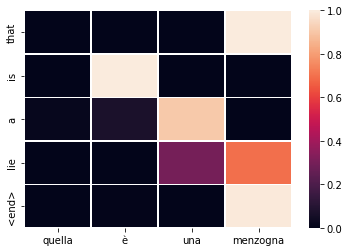

In [ ]:
i=10009
sent,attention=attention_predict(data['italian'][i],dot_model)
plot_attention(data['italian'][i],sent,attention)

<font color='blue'>**Calculate BLEU score**</font>

In [ ]:
test=data.sample(1000)
test.head()

,italian,english_inp,english_out
134846,lui mi ha salvata dal pericolo,<start> he saved me from danger,he saved me from danger <end>
276574,dovresti andare a messa più spesso,<start> you should go to mass more often,you should go to mass more often <end>
84557,tu ne vorresti un po,<start> would you like some,would you like some <end>
229877,attualmente abito in australia,<start> i currently live in australia,i currently live in australia <end>
21707,non ero io,<start> that was not me,that was not me <end>


In [ ]:
#Create an object of your custom model.
#Compile and train your model on dot scoring function.
# Visualize few sentences randomly in Test data
# Predict on 1000 random sentences on test data and calculate the average BLEU score of these sentences.
# https://www.nltk.org/_modules/nltk/translate/bleu_score.html

#Sample example
scores=[]
import statistics
import nltk.translate.bleu_score as bleu
for i in range(len(test)):
  prediction,weights=attention_predict(test['italian'].values[i],dot_model)
  reference = [test['english_out'].values[i].split()] # the original
  translation = prediction.split() # trasilated using model
  scores.append(bleu.sentence_bleu(reference, translation,weights=(1,0,0,0)))

ENCODER ==> INPUT SQUENCES SHAPE : (1, 6)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 6)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 5)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 4)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 3)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 6)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 9)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 7)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 8)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 3)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 5)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 7)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 5)


/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


ENCODER ==> INPUT SQUENCES SHAPE : (1, 3)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 7)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 4)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 2)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 5)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 12)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 4)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 4)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 3)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 4)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 4)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 7)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 4)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 10)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 4)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 6)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 5)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 4)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 5)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 5)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 6)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 4)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 5)
ENCODER ==> INPUT SQUENCES SHAPE

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


ENCODER ==> INPUT SQUENCES SHAPE : (1, 5)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 5)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 6)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 3)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 5)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 5)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 5)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 9)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 6)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 4)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 14)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 5)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 5)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 6)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 7)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 7)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 9)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 9)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 7)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 5)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 6)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 8)
ENCODER ==> INPUT SQUENCES SHAPE : (1, 4)
ENCODER ==> INPUT SQUENCES SHAPE 

In [ ]:
print('Average BLEU score :',statistics.mean(scores))  

Average BLEU score : 0.8012174915429399


<font color='blue'>**Repeat the same steps for General scoring function**</font>

In [ ]:
#Compile and train your model on general scoring function.
# Visualize few sentences randomly in Test data
# Predict on 1000 random sentences on test data and calculate the average BLEU score of these sentences.
# https://www.nltk.org/_modules/nltk/translate/bleu_score.html

In [34]:
general_model = encoder_decoder(encoder_inputs_length=25,decoder_inputs_length=25,batch_size=1024,score_fun='general',att_units=256,encoder_size=256,decoder_size=256)

In [35]:
def scheduler2(epoch,lr):
  if epoch%2==1:
    lr=0.9*lr
  return lr
callbacks=[ModelCheckpoint(filepath='best_general_model.h5',save_best_only=True,mode='min',save_weights_only=True),
           LearningRateScheduler(scheduler2)]#LearningRateScheduler(scheduler)

In [36]:
optimizer = tf.keras.optimizers.Adam(0.01)
general_model.compile(optimizer=optimizer,loss=loss_function)
train_steps=train.shape[0]//1024
valid_steps=validation.shape[0]//1024
general_model.fit(train_dataloader, batch_size=1024,steps_per_epoch=train_steps, epochs=50, validation_data=test_dataloader, validation_steps=valid_steps,callbacks=callbacks)

Epoch 1/50
276/276 [==============================] - 118s 407ms/step - loss: 1.5119 - val_loss: 1.3561 - lr: 0.0100
Epoch 2/50
276/276 [==============================] - 112s 405ms/step - loss: 1.2336 - val_loss: 1.1029 - lr: 0.0090
Epoch 3/50
276/276 [==============================] - 112s 406ms/step - loss: 0.9633 - val_loss: 0.7942 - lr: 0.0090
Epoch 4/50
276/276 [==============================] - 112s 404ms/step - loss: 0.6649 - val_loss: 0.5628 - lr: 0.0081
Epoch 5/50
276/276 [==============================] - 112s 407ms/step - loss: 0.4781 - val_loss: 0.4413 - lr: 0.0081
Epoch 6/50
276/276 [==============================] - 111s 402ms/step - loss: 0.3698 - val_loss: 0.3706 - lr: 0.0073
Epoch 7/50
276/276 [==============================] - 112s 405ms/step - loss: 0.3027 - val_loss: 0.3264 - lr: 0.0073
Epoch 8/50
276/276 [==============================] - 113s 409ms/step - loss: 0.2557 - val_loss: 0.2940 - lr: 0.0066
Epoch 9/50
276/276 [==============================] - 111s 403ms

KeyboardInterrupt: ignored

In [37]:
general_model.load_weights('best_general_model.h5')

In [38]:
general_model.evaluate(test_dataloader)

69/69 [==============================] - 10s 143ms/step - loss: 0.2071


0.20712852478027344

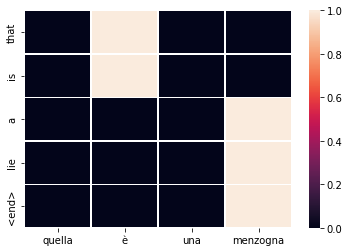

In [40]:
i=10009
sent,attention=attention_predict(data['italian'][i],general_model)
plot_attention(data['italian'][i],sent,attention)

In [42]:
test=data.sample(1000)
scores=[]
import statistics
import nltk.translate.bleu_score as bleu
for i in range(len(test)):
  prediction,weights=attention_predict(test['italian'].values[i],general_model)
  reference = [test['english_out'].values[i].split()] # the original
  translation = prediction.split() # trasilated using model
  scores.append(bleu.sentence_bleu(reference, translation,weights=(1,0,0,0)))

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg

In [43]:
import statistics
print('Average BLEU score for Model with General score function is :',statistics.mean(scores))

Average BLEU score for Model with General score function is : 0.8888081117757333


<font color='blue'>**Repeat the same steps for Concat scoring function**</font>

In [ ]:
#Compile and train your model on concat scoring function.
# Visualize few sentences randomly in Test data
# Predict on 1000 random sentences on test data and calculate the average BLEU score of these sentences.
# https://www.nltk.org/_modules/nltk/translate/bleu_score.html

In [73]:
concat_model = encoder_decoder(encoder_inputs_length=25,decoder_inputs_length=25,batch_size=1024,score_fun='concat',att_units=64,encoder_size=256,decoder_size=256)

In [74]:
def scheduler2(epoch,lr):
  if epoch%2==1:
    lr=0.9*lr
  return lr
callbacks=[ModelCheckpoint(filepath='best_concat_model.h5',save_best_only=True,mode='min',save_weights_only=True),
           LearningRateScheduler(scheduler2)]

In [75]:
optimizer = tf.keras.optimizers.Adam(0.01)
concat_model.compile(optimizer=optimizer,loss=loss_function)
train_steps=train.shape[0]//1024
valid_steps=validation.shape[0]//1024
concat_model.fit(train_dataloader, batch_size=1024,steps_per_epoch=train_steps, epochs=50, validation_data=test_dataloader, validation_steps=valid_steps,callbacks=callbacks)

Epoch 1/50
276/276 [==============================] - 130s 454ms/step - loss: 1.5095 - val_loss: 1.3742 - lr: 0.0100
Epoch 2/50
276/276 [==============================] - 124s 450ms/step - loss: 1.2085 - val_loss: 1.0538 - lr: 0.0090
Epoch 3/50
276/276 [==============================] - 124s 449ms/step - loss: 0.9075 - val_loss: 0.8924 - lr: 0.0090
Epoch 4/50
276/276 [==============================] - 126s 456ms/step - loss: 0.6944 - val_loss: 0.7545 - lr: 0.0081
Epoch 5/50
276/276 [==============================] - 124s 449ms/step - loss: 0.5235 - val_loss: 0.6163 - lr: 0.0081
Epoch 6/50
276/276 [==============================] - 124s 448ms/step - loss: 0.3947 - val_loss: 0.5470 - lr: 0.0073
Epoch 7/50
276/276 [==============================] - 125s 453ms/step - loss: 0.3179 - val_loss: 0.5038 - lr: 0.0073
Epoch 8/50
276/276 [==============================] - 125s 452ms/step - loss: 0.2603 - val_loss: 0.4751 - lr: 0.0066
Epoch 9/50
276/276 [==============================] - 134s 485ms

KeyboardInterrupt: ignored

In [76]:
concat_model.load_weights('/content/best_concat_model.h5')

In [77]:
concat_model.evaluate(test_dataloader)

69/69 [==============================] - 15s 217ms/step - loss: 0.3953


0.3953363597393036

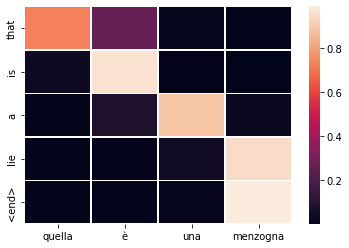

In [80]:
i=10009
sent,attention=attention_predict(data['italian'][i],concat_model)
plot_attention(data['italian'][i],sent,attention)

In [81]:
test=data.sample(1000)
scores=[]
import statistics
import nltk.translate.bleu_score as bleu
for i in range(len(test)):
  prediction,weights=attention_predict(test['italian'].values[i],concat_model)
  reference = [test['english_out'].values[i].split()] # the original
  translation = prediction.split() # trasilated using model
  scores.append(bleu.sentence_bleu(reference, translation,weights=(1,0,0,0)))

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg

In [82]:
import statistics
print('Average BLEU score for Model with Concat score function is :',statistics.mean(scores))

Average BLEU score for Model with Concat score function is : 0.7295647526276


In [ ]:
# Write your observations on each of the scoring function